# Project 2 - Ames Housing Data and Kaggle Challenge

# Part 2 - Cleaning test data

# Problem Statement

As real estate analysts in Iowa, we are responsible for managing our organization's real estate holdings.

We are tasked with understanding real estate market trends and to minimize current and future real estate holding risks.

We will be conducting data analysis on the Iowa real estate market and determine which are the factors that affects property prices.

The purpose of this analysis is to better understand a property price and provide suitable insights to management and potential buyers of the organization's real estate.

# Executive Summary

Part 1: <br>
1. Importing all necessary libraries <br>
2. Importing training dataset "train.csv". <br>
3. Data Cleaning <br>
4. EDA <br>

Part 2:
1. Importing all necessary libraries <br>
2. Importing training dataset "test.csv". <br>
3. Data Cleaning <br>
4. EDA <br>

Part 3: <br>
1. Feature Engineering <br>
2. Modelling, L1 & L2 regularization <br>
3. Residuals and model evaluation <br>
4. Results interpretation <br>

readme.md: <br>
1. Recommendations <br>
2. Future steps forward for the project <br>
3. Research about the topic
4. Sources <br>

# 1. Importing all necessary libraries

In [1]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import scipy.stats
from scipy import stats
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
traindata = pd.read_csv('datasets/test.csv') ### Test data

In [3]:
#traindata = pd.concat([traindata, testdata])

In [4]:
traindata.shape

(878, 80)

In [5]:
traindata.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New


In [6]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [7]:
missing = pd.DataFrame(traindata.isnull().sum(), columns=['value'])
missing.T

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
value,0,0,0,0,160,0,0,820,0,0,...,0,0,0,874,706,837,0,0,0,0


In [8]:
missing1 = missing[missing['value'] != 0]

In [9]:
missing1

,value
Lot Frontage,160
Alley,820
Mas Vnr Type,1
Mas Vnr Area,1
Bsmt Qual,25
Bsmt Cond,25
Bsmt Exposure,25
BsmtFin Type 1,25
BsmtFin Type 2,25
Electrical,1


In [10]:
missing1.shape

(19, 1)

In [11]:
traindata.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,878.0,1.444749e+03,8.508383e+02,2.0,6.922500e+02,1433.0,2.197500e+03,2.928000e+03
PID,878.0,7.162867e+08,1.889103e+08,526302110.0,5.284841e+08,535454155.0,9.071904e+08,1.007100e+09
MS SubClass,878.0,5.826879e+01,4.223541e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,718.0,6.954596e+01,2.353394e+01,21.0,5.900000e+01,68.0,8.000000e+01,1.820000e+02
Lot Area,878.0,1.030703e+04,1.000267e+04,1477.0,7.297250e+03,9446.0,1.158900e+04,2.152450e+05
Overall Qual,878.0,6.050114e+00,1.369065e+00,2.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,878.0,5.566059e+00,1.128903e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,878.0,1.970492e+03,3.039589e+01,1880.0,1.954000e+03,1972.0,1.999750e+03,2.010000e+03
Year Remod/Add,878.0,1.984418e+03,2.045072e+01,1950.0,1.967000e+03,1992.0,2.003000e+03,2.010000e+03
Mas Vnr Area,877.0,1.062360e+02,1.871589e+02,0.0,0.000000e+00,0.0,1.720000e+02,1.378000e+03


# Data Exploring Results

Abnormal values:
Min - There are no abnormal or negative values.
Max - There are no abnormally high values except: PID
Outliers - There are no abnormal outliers except: PID (which seems to have no range)

Missing values:
1. There are 26 rows with missing data.
2. Looking at the missing data, it seems like there is a mix of true missing data where it is not entered and also data where it is null because it has no such feature.

In [12]:
missing1

,value
Lot Frontage,160
Alley,820
Mas Vnr Type,1
Mas Vnr Area,1
Bsmt Qual,25
Bsmt Cond,25
Bsmt Exposure,25
BsmtFin Type 1,25
BsmtFin Type 2,25
Electrical,1


# Understanding Missing Data

I'll name the dataframe 'DataFrame1' for ease of reference. <br>
DataFrame1:

In [13]:
traindata[missing1.index].head(3)

,Lot Frontage,Alley,Mas Vnr Type,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond,Pool QC,Fence,Misc Feature
0,69.0,Grvl,None,0.0,Fa,TA,No,Unf,Unf,FuseP,NaN,Detchd,1910.0,Unf,Po,Po,NaN,NaN,NaN
1,NaN,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,NaN,Attchd,1977.0,Fin,TA,TA,NaN,NaN,NaN
2,58.0,NaN,None,0.0,Gd,Gd,Av,GLQ,Unf,SBrkr,Gd,Attchd,2006.0,RFn,TA,TA,NaN,NaN,NaN


From DataFrame1, we can see that the missing data might not actually be literal missing, but rather it lacks such a feature hence it is empty.

# Correcting NaN Data

In [14]:
datatype1 = pd.DataFrame(missing1.T.dtypes, columns=['data'])

In [15]:
mdata = missing1.merge(datatype1, left_index=True, right_index=True)

In [16]:
mdata

,value,data
Lot Frontage,160,int64
Alley,820,int64
Mas Vnr Type,1,int64
Mas Vnr Area,1,int64
Bsmt Qual,25,int64
Bsmt Cond,25,int64
Bsmt Exposure,25,int64
BsmtFin Type 1,25,int64
BsmtFin Type 2,25,int64
Electrical,1,int64


## 1. Lot Frontage

In [17]:
traindata['Lot Frontage'].describe()

count    718.000000
mean      69.545961
std       23.533945
min       21.000000
25%       59.000000
50%       68.000000
75%       80.000000
max      182.000000
Name: Lot Frontage, dtype: float64

To fill up 'Lot Frontage' with 0 to manage NaN data as the column is made up of a float datatype. <br>
And it is likely that NaN in this scenario is referring to 'No Lot Frontage' instead of 'Missing Data'.

In [18]:
traindata['Lot Frontage'] = traindata['Lot Frontage'].fillna(0)

In [19]:
traindata['Lot Frontage'].isnull().sum()

0

## 2. Alley

In [20]:
traindata['Alley'].unique()

array(['Grvl', nan, 'Pave'], dtype=object)

To fill up 'Alley' Nan data with 'NA' (string) to indicate that there's none.

In [21]:
traindata['Alley'] = traindata['Alley'].fillna('NA')

In [22]:
traindata['Alley'].isnull().sum()

0

## 3. Mas Vnr Type & Mas Vnr Area

Both of these has the same number of missing data and has the same name. <br>
It is likely that these 2 categories are related to each other, and it is not missing data, rather the feature does not exist.

In [23]:
traindata['Mas Vnr Type'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', 'CBlock', nan], dtype=object)

###### As there is 'None' and NaN, the data has to be investigated further.

In [24]:
traindata[traindata['Mas Vnr Type'] == 'None'].index

Int64Index([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,
            ...
            860, 862, 867, 868, 870, 872, 873, 875, 876, 877],
           dtype='int64', length=534)

In [25]:
traindata[traindata['Mas Vnr Type'] == 'None']['Mas Vnr Area'].describe()

count    534.000000
mean       1.117978
std       18.269484
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      312.000000
Name: Mas Vnr Area, dtype: float64

In [26]:
traindata[traindata['Mas Vnr Type'] == 'None']['Mas Vnr Area'].unique()

array([  0., 285., 312.])

###### Even when 'Mas Vnr Type' == 'None',  'Mas Vnr Area' contains data.
###### Hence, it would be incorrect if the NaN data is entered is 'NA'.

In [27]:
traindata[traindata['Mas Vnr Type'].isnull()].index

Int64Index([865], dtype='int64')

In [28]:
traindata[traindata['Mas Vnr Area'].isnull()].index

Int64Index([865], dtype='int64')

###### However, when data is NaN, the indexes are the same.
Hence, the NaN values will be replaced with 'others', with the 'Mas Vnr Area' replaced with -1.0 indicating 'others' category.

In [29]:
traindata['Mas Vnr Type'] = traindata['Mas Vnr Type'].fillna('others')

In [30]:
traindata['Mas Vnr Area'] = traindata['Mas Vnr Area'].fillna(-1.0)

In [31]:
print(f"{traindata['Mas Vnr Type'].isnull().sum()}; Type null data count")
print(f"{traindata['Mas Vnr Area'].isnull().sum()}; Area null data count")

0; Type null data count
0; Area null data count


## 4. Bsmt and its sub categories

Filtering columns by regex expression "Bsmt":

In [32]:
bsmt_df = traindata.filter(regex=("Bsmt"))
bsmt_df.head(3)

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
0,Fa,TA,No,Unf,0,Unf,0,1020,1020,0,0
1,Gd,TA,No,Unf,0,Unf,0,1967,1967,0,0
2,Gd,Gd,Av,GLQ,554,Unf,0,100,654,1,0


In [33]:
bsmt_df.columns

Index(['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'],
      dtype='object')

In [34]:
bsmt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Bsmt Qual       853 non-null    object
 1   Bsmt Cond       853 non-null    object
 2   Bsmt Exposure   853 non-null    object
 3   BsmtFin Type 1  853 non-null    object
 4   BsmtFin SF 1    878 non-null    int64 
 5   BsmtFin Type 2  853 non-null    object
 6   BsmtFin SF 2    878 non-null    int64 
 7   Bsmt Unf SF     878 non-null    int64 
 8   Total Bsmt SF   878 non-null    int64 
 9   Bsmt Full Bath  878 non-null    int64 
 10  Bsmt Half Bath  878 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 75.6+ KB


###### By understanding the relationship that Total Bsmt SF = BsmtFin SF 1 + Bsmt Unf SF, it is likely that most of the NaN is coming from the data where Total Bsmt SF == 0 where the Bsmt feature does not exist.

In [35]:
bsmt_0 = bsmt_df[bsmt_df['Total Bsmt SF'] == 0]

In [36]:
bsmt_0.describe()

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
count,25.0,25.0,25.0,25.0,25.0,25.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
bsmt_0.head(3)

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
15,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
37,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
76,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


In [38]:
bsmt_0.columns

Index(['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'],
      dtype='object')

###### Columns: 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2' NaN values will be replaced with 'NA' to indicate that there is no such feature.

In [39]:
bsmt_nan = bsmt_0[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']]

In [40]:
bsmt_nan.fillna('NA').head(3)

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
15,NA,NA,NA,NA,0,NA,0,0,0,0,0
37,NA,NA,NA,NA,0,NA,0,0,0,0,0
76,NA,NA,NA,NA,0,NA,0,0,0,0,0


In [41]:
pd.DataFrame(bsmt_nan.isnull().sum(), columns=['bsmt_null'])

,bsmt_null
Bsmt Qual,25
Bsmt Cond,25
Bsmt Exposure,25
BsmtFin Type 1,25
BsmtFin SF 1,0
BsmtFin Type 2,25
BsmtFin SF 2,0
Bsmt Unf SF,0
Total Bsmt SF,0
Bsmt Full Bath,0


After zeroing the NaN for ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
       
There remains NaN in the data. <br>
These data needs to be investigated further.

In [42]:
bsmt_nan_leftovers = bsmt_nan[bsmt_nan.isna().any(axis=1)]

In [43]:
bsmt_nan_leftovers.shape

(25, 11)

In [44]:
bsmt_nan_leftovers.describe()

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
count,25.0,25.0,25.0,25.0,25.0,25.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


The leftover NaN data are all empty, likely signifying that these features does not exist. <br>
Therefore it is safe to replace data with 'NA' or 0.0 according to the column datatype.

### Replacing Bsmt NaN data

In [45]:
bsmt_df.columns

Index(['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'],
      dtype='object')

###### 1. Bsmt Qual

In [46]:
bsmt_df['Bsmt Qual'].unique()

array(['Fa', 'Gd', 'TA', 'Ex', nan, 'Po'], dtype=object)

In [47]:
bsmt_df['Bsmt Qual'] = bsmt_df['Bsmt Qual'].fillna('NA')

In [48]:
bsmt_df['Bsmt Qual'].isnull().sum()

0

###### 2. Bsmt Cond

In [49]:
bsmt_df['Bsmt Cond'].unique()

array(['TA', 'Gd', nan, 'Fa'], dtype=object)

In [50]:
bsmt_df['Bsmt Cond'] = bsmt_df['Bsmt Cond'].fillna('NA')

In [51]:
bsmt_df['Bsmt Cond'].isnull().sum()

0

###### 3. Bsmt Exposure

In [52]:
bsmt_df['Bsmt Exposure'].unique()

array(['No', 'Av', nan, 'Mn', 'Gd'], dtype=object)

In [53]:
bsmt_df['Bsmt Exposure'] = bsmt_df['Bsmt Exposure'].fillna('NA')

In [54]:
bsmt_df['Bsmt Cond'].isnull().sum()

0

###### 4. BsmtFin Type 1

In [55]:
bsmt_df['BsmtFin Type 1'].unique()

array(['Unf', 'GLQ', 'BLQ', 'Rec', 'ALQ', nan, 'LwQ'], dtype=object)

In [56]:
bsmt_df['BsmtFin Type 1'] = bsmt_df['BsmtFin Type 1'].fillna('NA')

In [57]:
bsmt_df['BsmtFin Type 1'].isnull().sum()

0

###### 5. BsmtFin SF 1

In [58]:
bsmt_df['BsmtFin SF 1'].unique()

array([   0,  554,  609,  294,  196,  641,  278,  820,  590,  257,  913,
        216,  188,  660,  165,  938,  390,  763,  144,  322,  152, 1084,
         24,  284,  405,  650,  949,  486,  248,  824,  324,  220,  439,
        329,  457,  636,  735, 1660, 1300,  190,  583,  387,  236,  614,
       1030,  544,  697, 1230,  540,  500,  528,  701, 1383,  308,  316,
        173,  462,  480,  962,  120,  588,  767,  306,  870,  472,  643,
       1252,  658, 2257,  777,  518,  687,  704,  844, 1443, 1387, 1104,
        602, 1572, 1191,  182, 1249,  360,   68,  502,  828,  267,  944,
        550,  426,  866,  596,  982,   49,  378,  121,  491,  769,  902,
        873,   48,  994,  352, 2288,   33,  814,   16,  788, 2096,  746,
        612,  600,  483,  252,  739,  552,  125,  204,  652,  474,  194,
        915,  210,  489,  773,  729,  646,  271,  456,   70,  871,  442,
        224, 1236, 1141,  397,  810,  749,  574,  450, 1056,  400,  238,
        793, 1035,  150, 1036,  592, 1360, 1721,  2

In [59]:
bsmt_df['BsmtFin SF 1'] = bsmt_df['BsmtFin SF 1'].fillna(0)

In [60]:
bsmt_df['BsmtFin SF 1'].dtypes

dtype('int64')

In [61]:
bsmt_df['BsmtFin SF 1'].isnull().sum()

0

###### 6. BsmtFin Type 2

In [62]:
bsmt_df['BsmtFin Type 2'].unique()

array(['Unf', 'LwQ', nan, 'ALQ', 'GLQ', 'Rec', 'BLQ'], dtype=object)

In [63]:
bsmt_df['BsmtFin Type 2'] = bsmt_df['BsmtFin Type 2'].fillna('NA')

In [64]:
bsmt_df['BsmtFin Type 2'].isnull().sum()

0

###### 7. BsmtFin SF 2

In [65]:
bsmt_df['BsmtFin SF 2'].unique()

array([   0,  279,  668,  841,  180,  240,  472,  374,  873, 1526, 1020,
        337,  210,  136,   46,  453,  252, 1029,  634,  468, 1164, 1031,
        884,  606,  820,  826,   63,  480,  184,  336,  391,  147,  398,
        182,  250,  165,  627,  393,  723,  449,  319,  682,  912,  530,
        276,  831,  121,   93,  288,  287,   48,   32,  193,  684,  456,
        904,  764,  755,  544,  402,  491,  691,  243,   40,  344,  543,
         42,  712,   78,  352,  350,  438,  690,  679,  216,  362,  694,
        435,  972,  144,  360,  791,  448,  264,  168,  981,  176,  174,
        396,  799,  400,  630,  139,  512,  153,  492], dtype=int64)

In [66]:
bsmt_df['BsmtFin SF 2'] = bsmt_df['BsmtFin SF 2'].fillna(0)

In [67]:
bsmt_df['BsmtFin SF 2'].isnull().sum()

0

###### 8. Bsmt Unf SF

In [68]:
bsmt_df['Bsmt Unf SF'].unique()

array([1020, 1967,  100,  968,  785,  252,  869, 1072,  840,  276,  939,
       1040, 1367,  348,  848,    0,  294,  816,  400,  700,  204,  598,
       1218,  474,  715,  636,  173,  226,  536,  628, 1240,   92, 1468,
        608,  863,  105, 1339,  612,  930,  658,  178,  552,  546,  434,
        187,  448,  216,  588,  346, 1615,  803,  248,  115,  697,  193,
        540,  257,  322,   95,  242,  374,  262,  244,  272,  151,  600,
        278,  384,  543, 1152,  397, 1459,  321,  371,  166,  154, 2042,
        396,  270, 1686,  744,  411,  560,  827,  461,  422,  639, 1530,
        355,  167,  306,  998,  218,  467,  357,  179,  491, 1921, 1128,
        590, 1058, 1140,   39,  360,  630,  616,  324,  394, 1085,  523,
        795,  165,  504,  365,  497,  513,  136,  194,  850, 1369, 1114,
        436,  220,  756, 1632,  960, 1048,  311,  592, 1619,  860,  901,
        768,  196,   63, 1055,  484,  416,  108,  342, 1451,  300, 1129,
        172, 1421,  712,  312,  691, 1466,  503,  8

In [69]:
bsmt_df['Bsmt Unf SF'] = bsmt_df['Bsmt Unf SF'].fillna(0)

In [70]:
bsmt_df['Bsmt Unf SF'].isnull().sum()

0

###### 9. Total Bsmt SF

In [71]:
bsmt_df['Total Bsmt SF'].unique()

array([1020, 1967,  654,  968, 1394,  546,  869, 1268,  840, 1196, 1217,
       1040, 1367, 1168,  848,    0,  884, 1073, 1313,  916, 1060,  864,
       1604,  938, 1218,  715,  636,  936,  370,  858,  780, 1240, 1176,
       1492,  608, 1147,  105, 1339,  612,  930, 1063, 1008, 1501,  920,
        828,  912,  346, 1615,  803,  468, 1026, 1024,  992, 1982, 1300,
       1158,  825,  761, 2024, 1302,  544,  600, 1508, 1560,  384, 1043,
       1680, 1135, 1780, 1459,  629,  687,  676,  616, 2042,  876, 1232,
       1686,  999,  560,  827, 1228,  728, 1509, 1554,  810, 1694,  998,
       2535, 1244,  686,  697, 1224, 1921, 1832, 1434, 1058, 1140, 1482,
       1930,  360,  630, 1720,  926, 1966, 1085, 1714,  794,  795, 1414,
        565, 1530, 1015,  943,  720, 1080,  744, 1528, 1369, 1114,  816,
       1161, 1078,  756, 1632,  960, 1048,  689,  592, 1740,  860,  988,
        901,  768, 1098, 1104, 1055, 1478, 1056, 2630, 1451, 1563, 1145,
       1445, 2396,  990, 1776,  712,  691, 1949, 12

In [72]:
bsmt_df['Total Bsmt SF'] = bsmt_df['Total Bsmt SF'].fillna(0)

In [73]:
bsmt_df['Total Bsmt SF'].isnull().sum()

0

###### 10. Bsmt Full Bath

In [74]:
bsmt_df['Bsmt Full Bath'].unique()

array([0, 1, 2], dtype=int64)

Bsmt Full Bath column is on a scale, hence the value given will be -1 so as not to mix up with 0 where the feature actually exists. <br>

In [75]:
bsmt_df['Bsmt Full Bath'] = bsmt_df['Bsmt Full Bath'].fillna(-1)

In [76]:
bsmt_df['Bsmt Full Bath'].isnull().sum()

0

###### 11. Bsmt Half Bath

In [77]:
bsmt_df['Bsmt Half Bath'].unique()

array([0, 1], dtype=int64)

Bsmt Half Bath column is on a scale, hence the value given will be -1 so as not to mix up with 0 where the feature actually exists. <br>

In [78]:
bsmt_df['Bsmt Half Bath'] = bsmt_df['Bsmt Half Bath'].fillna(-1)

In [79]:
bsmt_df['Bsmt Half Bath'].isnull().sum()

0

##### Checking bsmt_df

In [80]:
bsmt_df.isnull().sum()

Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
dtype: int64

In [81]:
bsmt_df.shape

(878, 11)

There are no more null values for Bsmt data, and the shape and index remained unchanged.

### Dropping and merging new non-null dataframe into traindata dataframe

In [82]:
traindata = traindata.drop(columns=['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'])

In [83]:
traindata = traindata.merge(bsmt_df, left_index = True, right_index = True)

In [84]:
traindata.shape

(878, 80)

In [85]:
traindata.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,TA,No,Unf,0,Unf,0,1020,1020,0,0
1,2718,905108090,90,RL,0.0,9662,Pave,NA,IR1,Lvl,...,TA,No,Unf,0,Unf,0,1967,1967,0,0
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,...,Gd,Av,GLQ,554,Unf,0,100,654,1,0


## 5. Fireplace Qu

In [86]:
traindata['Fireplace Qu'].unique()

array([nan, 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object)

Replacing 'Fireplace Qu' with 'NA' since this feature does not exist.

In [87]:
traindata['Fireplace Qu'] = traindata['Fireplace Qu'].fillna('NA')

In [88]:
traindata['Fireplace Qu'].isnull().sum()

0

## 6. Garage and its sub categories

In [89]:
garage_df = traindata.filter(regex=("Garage"))
garage_df.head(3)

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,Detchd,1910.0,Unf,1,440,Po,Po
1,Attchd,1977.0,Fin,2,580,TA,TA
2,Attchd,2006.0,RFn,2,426,TA,TA


In [90]:
garage_df.columns

Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond'],
      dtype='object')

In [91]:
garage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Type    834 non-null    object 
 1   Garage Yr Blt  833 non-null    float64
 2   Garage Finish  833 non-null    object 
 3   Garage Cars    878 non-null    int64  
 4   Garage Area    878 non-null    int64  
 5   Garage Qual    833 non-null    object 
 6   Garage Cond    833 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 48.1+ KB


In [92]:
garage_df.isnull().sum()

Garage Type      44
Garage Yr Blt    45
Garage Finish    45
Garage Cars       0
Garage Area       0
Garage Qual      45
Garage Cond      45
dtype: int64

In [93]:
garage_df.describe()

,Garage Yr Blt,Garage Cars,Garage Area
count,833.000000,878.000000,878.000000
mean,1976.759904,1.742597,470.362187
std,25.689763,0.750391,212.734075
min,1900.000000,0.000000,0.000000
25%,1960.000000,1.000000,322.500000
50%,1978.000000,2.000000,473.000000
75%,2001.000000,2.000000,576.000000
max,2010.000000,4.000000,1488.000000


Garage Area has a <b>minimum</b> value of 0.00 likely signifying these properties with 0 area has no garage. <br>

In [94]:
garage_0 = garage_df[garage_df['Garage Area'] == 0]

In [95]:
garage_0.describe()

,Garage Yr Blt,Garage Cars,Garage Area
count,0.0,44.0,44.0
mean,NaN,0.0,0.0
std,NaN,0.0,0.0
min,NaN,0.0,0.0
25%,NaN,0.0,0.0
50%,NaN,0.0,0.0
75%,NaN,0.0,0.0
max,NaN,0.0,0.0


From the description of the data above, it can be seen that Garage Area of 0 contains empty values or NaN values.

In [96]:
garage_0.shape

(44, 7)

In [97]:
garage_df[garage_df.isna().any(axis=1)].shape

(45, 7)

From the shape of the dataframe, we can see that there is one row where Garage Area is not equals to 0.

In [98]:
garage_nulls = garage_df[garage_df.isna().any(axis=1)]

In [99]:
garage_nulls1 = garage_nulls[garage_nulls['Garage Area'] != 0]
garage_nulls1

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
764,Detchd,NaN,NaN,1,360,NaN,NaN


From the row exception shown above, it can be seen that 'Detched' is an outlier category in this particular case where other columns such as 'Garage Yr Blt', 'Garage Cars' etc are also NaN. <br>
It likely signifies that such a feature does not exist. <br>

Hence, 'garage_df' NaN will be input as 'NA' as well as the category exception above.

###### Checking Garage Columns

In [100]:
garage_df.columns

Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond'],
      dtype='object')

###### 1. Garage Type

In [101]:
garage_df['Garage Type'][1712] = 'NA'

In [102]:
garage_df['Garage Type'] = garage_df['Garage Type'].fillna('NA')

In [103]:
garage_df['Garage Type'].unique()

array(['Detchd', 'Attchd', 'BuiltIn', 'NA', '2Types', 'CarPort',
       'Basment'], dtype=object)

In [104]:
garage_df['Garage Type'].isnull().sum()

0

###### 2. Garage Yr Blt

In [105]:
garage_df['Garage Yr Blt'].unique()

array([1910., 1977., 2006., 1935., 1963., 1972., 1959., 1978., 2004.,
       1980., 1991., 1993., 1954., 2000., 1943., 1957., 1940., 1956.,
       1961., 1925., 1968., 1982., 1969., 2007., 1989., 1920., 1937.,
         nan, 1979., 1962., 1950., 1973., 2001., 1952., 1953., 1999.,
       2009., 1998., 1974., 1951., 1987., 2003., 1924., 1970., 1975.,
       1958., 1971., 1992., 1994., 2005., 1960., 1967., 2002., 1997.,
       1981., 1938., 1988., 1939., 1927., 1984., 1964., 1995., 2008.,
       1966., 1941., 1983., 1906., 1930., 1955., 1946., 1996., 1928.,
       1976., 1915., 1923., 1965., 1947., 1900., 1918., 1934., 1932.,
       1986., 2010., 1985., 1949., 1948., 1917., 1990., 1921., 1926.,
       1931., 1916., 1922., 1908.])

In [106]:
garage_df['Garage Yr Blt'] = garage_df['Garage Yr Blt'].fillna(0)

In [107]:
garage_df['Garage Yr Blt'].isnull().sum()

0

###### 3. Garage Finish

In [108]:
garage_df['Garage Finish'].unique()

array(['Unf', 'Fin', 'RFn', nan], dtype=object)

In [109]:
garage_df['Garage Finish'] = garage_df['Garage Finish'].fillna('NA')

In [110]:
garage_df['Garage Finish'].isnull().sum()

0

###### 4. Garage Cars

In [111]:
garage_df['Garage Cars'].unique()

array([1, 2, 4, 0, 3], dtype=int64)

Garage cars is a category hence, null is assigned as -1.

In [112]:
garage_df['Garage Cars'] = garage_df['Garage Cars'].fillna(-1)

In [113]:
garage_df['Garage Cars'].isnull().sum()

0

###### 5. Garage Area

In [114]:
garage_df['Garage Area'].unique()

array([ 440,  580,  426,  480,  514,  286,  308,  252,  588,  473,  484,
        320,  451,  820,  240,  828,  340,  418,  424,  270,  732,  533,
        540,  576,  352,  368,    0,  684,  539,  864,  439,  608,  454,
        162,  460,  414,  625,  528,  431,  624,  288,  512,  300,  160,
        297,  506,  839,  938,  400,  303,  464,  815,  631,  420,  640,
        402,  336,  264,  294,  816,  527,  603, 1390,  495,  511,  384,
        472,  224,  374,  322,  627,  642,  789,  678,  807,  672,  846,
        470, 1092,  753,  517,  388, 1003,  355,  984,  370,  315,  312,
        605,  676,  216,  299,  565,  332,  260,  833,  905,  508,  762,
        758,  437,  541,  813,  409,  586,  324,  486,  518,  478,  280,
        253,  275,  276,  393,  880,  962,  432,  379,  668,  205,  513,
        521,  483,  399,  779,  574,  307,  889,  795,  754, 1134,  466,
        685,  656,  502,  746,  870,  396,  463,  617,  615,  258,  706,
        461,  422,  425,  520,  525,  614, 1014,  3

In [115]:
garage_df['Garage Area'] = garage_df['Garage Area'].fillna(0)

In [116]:
garage_df['Garage Area'].isnull().sum()

0

###### 6. Garage Qual

In [117]:
garage_df['Garage Qual'].unique()

array(['Po', 'TA', 'Fa', nan, 'Gd'], dtype=object)

In [118]:
garage_df['Garage Qual'] = garage_df['Garage Qual'].fillna('NA')

In [119]:
garage_df['Garage Qual'].isnull().sum()

0

###### 7. Garage Cond

In [120]:
garage_df['Garage Cond'].unique()

array(['Po', 'TA', nan, 'Fa', 'Gd', 'Ex'], dtype=object)

In [121]:
garage_df['Garage Cond'] = garage_df['Garage Cond'].fillna('NA')

In [122]:
garage_df['Garage Cond'].isnull().sum()

0

###### Checking garage_df for null values.

In [123]:
garage_df.isnull().sum()

Garage Type      0
Garage Yr Blt    0
Garage Finish    0
Garage Cars      0
Garage Area      0
Garage Qual      0
Garage Cond      0
dtype: int64

#### All Garage related subcategories null values have been corrected.

In [124]:
garage_df.columns

Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond'],
      dtype='object')

##### Ensuring that the shape of the dataframe pre-drop and post-merge is correct.

In [125]:
garage_df.shape

(878, 7)

In [126]:
traindata.shape

(878, 80)

In [127]:
traindata = traindata.drop(columns=['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond'])

In [128]:
traindata.shape

(878, 73)

In [129]:
traindata = traindata.merge(garage_df, left_index=True, right_index=True)

In [130]:
traindata.shape

(878, 80)

## 7. Pool QC

In [131]:
traindata['Pool QC'].isnull().sum()

874

In [132]:
len(traindata['Pool QC'])

878

In [133]:
(traindata['Pool QC'].isnull().sum())/(len(traindata['Pool QC'])) * 100

99.54441913439635

In [134]:
traindata[traindata['Pool QC'].isnull()].head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,1020,0,0,Detchd,1910.0,Unf,1,440,Po,Po
1,2718,905108090,90,RL,0.0,9662,Pave,NA,IR1,Lvl,...,1967,0,0,Attchd,1977.0,Fin,2,580,TA,TA
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,...,654,1,0,Attchd,2006.0,RFn,2,426,TA,TA


In [135]:
traindata['Pool QC'] = traindata['Pool QC'].fillna('NA')

In [136]:
traindata['Pool QC'].isnull().sum()

0

## 8. Fence

In [137]:
traindata['Fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [138]:
traindata['Fence'] = traindata['Fence'].fillna('NA')

In [139]:
traindata['Fence'].value_counts()

NA       706
MnPrv    103
GdPrv     35
GdWo      32
MnWw       2
Name: Fence, dtype: int64

In [140]:
traindata['Fence'].isnull().sum()

0

## 9. Misc Feature

In [141]:
traindata['Misc Feature'].unique()

array([nan, 'Shed', 'Othr', 'Gar2'], dtype=object)

Since there is already a category called 'Othr', NaN could mean that there are no misc features.

In [142]:
traindata['Misc Feature'] = traindata['Misc Feature'].fillna('NA')

In [143]:
traindata['Misc Feature'].isnull().sum()

0

## 10. Electrical

In [144]:
traindata['Electrical'] = traindata['Electrical'].fillna('NA')

In [145]:
traindata['Electrical'].isnull().sum()

0

## Checking that traindata dataframe null values have been corrected.

In [146]:
traindata.isnull().sum().sum()

0

In [147]:
traindata.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,1020,0,0,Detchd,1910.0,Unf,1,440,Po,Po
1,2718,905108090,90,RL,0.0,9662,Pave,NA,IR1,Lvl,...,1967,0,0,Attchd,1977.0,Fin,2,580,TA,TA
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,...,654,1,0,Attchd,2006.0,RFn,2,426,TA,TA


In [148]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     878 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            878 non-null    object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

## Exploratory Data Analysis

In [149]:
traindata.shape

(878, 80)

#### Splitting columns into quantitative and qualitative and binary data.

To determine correlation coefficient based on Pearson, Spearman correlation coefficient.

###### 1. Quantitative: quant

In [150]:
traindata.select_dtypes(include=['float64']).columns

Index(['Lot Frontage', 'Mas Vnr Area', 'Garage Yr Blt'], dtype='object')

In [151]:
quantdata_tolist = traindata.select_dtypes(include=['float64']).columns.to_list()

In [152]:
quant = traindata[quantdata_tolist]

###### 2. Qualitative: qual

In [153]:
qual_df = traindata.select_dtypes(include=['object'])

In [154]:
qual_df.head(3)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Sale Type,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,WD,Fa,TA,No,Unf,Unf,Detchd,Unf,Po,Po
1,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,WD,Gd,TA,No,Unf,Unf,Attchd,Fin,TA,TA
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,New,Gd,Gd,Av,GLQ,Unf,Attchd,RFn,TA,TA


In [155]:
qual_tolist = traindata.select_dtypes(include=['object']).columns.to_list()

### Checking for categorical vs ordinal data

In [156]:
for i in qual_tolist:
    print(f'{i}, {qual_df[i].unique()}')

MS Zoning, ['RM' 'RL' 'FV' 'RH' 'C (all)' 'I (all)']
Street, ['Pave' 'Grvl']
Alley, ['Grvl' 'NA' 'Pave']
Lot Shape, ['Reg' 'IR1' 'IR3' 'IR2']
Land Contour, ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities, ['AllPub' 'NoSewr']
Lot Config, ['Inside' 'CulDSac' 'Corner' 'FR2' 'FR3']
Land Slope, ['Gtl' 'Mod' 'Sev']
Neighborhood, ['OldTown' 'Sawyer' 'Gilbert' 'NAmes' 'MeadowV' 'CollgCr' 'Somerst'
 'Mitchel' 'SawyerW' 'IDOTRR' 'BrkSide' 'Edwards' 'ClearCr' 'NWAmes'
 'Timber' 'NoRidge' 'NridgHt' 'Crawfor' 'StoneBr' 'Veenker' 'BrDale'
 'SWISU' 'Blmngtn' 'NPkVill' 'Greens' 'Blueste']
Condition 1, ['Norm' 'Feedr' 'Artery' 'PosA' 'RRAn' 'RRNn' 'RRAe' 'RRNe' 'PosN']
Condition 2, ['Norm' 'Feedr' 'PosA']
Bldg Type, ['2fmCon' 'Duplex' '1Fam' 'TwnhsE' 'Twnhs']
House Style, ['2Story' '1Story' '1.5Fin' 'SLvl' 'SFoyer' '2.5Fin' '2.5Unf' '1.5Unf']
Roof Style, ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']
Roof Matl, ['CompShg' 'Metal' 'WdShake' 'Tar&Grv' 'WdShngl' 'Roll']
Exterior 1st, ['AsbShng' 'Plywood' 'VinylSd'

In [157]:
ord_df = qual_df[["Exter Qual", "Exter Cond", "Heating QC", "Kitchen Qual",
           "Fireplace Qu", "Pool QC", "Bsmt Qual", "Bsmt Cond",
           "Bsmt Exposure", "Garage Qual", "Garage Cond"]]

In [158]:
ord_df_tolist = ord_df.columns.to_list()

In [159]:
qual = qual_df.drop(columns=ord_df_tolist)

In [160]:
qual.head(3)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Electrical,Functional,Paved Drive,Fence,Misc Feature,Sale Type,BsmtFin Type 1,BsmtFin Type 2,Garage Type,Garage Finish
0,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,FuseP,Typ,Y,NA,NA,WD,Unf,Unf,Detchd,Unf
1,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,SBrkr,Typ,Y,NA,NA,WD,Unf,Unf,Attchd,Fin
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,SBrkr,Typ,Y,NA,NA,New,GLQ,Unf,Attchd,RFn


In [161]:
qual_tolist = qual.columns.to_list()

###### 3. Ordinal Data - Integer: bin_data

In [162]:
traindata.select_dtypes(include=['int64']).columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [163]:
intdata_tolist = traindata.select_dtypes(include=['int64']).columns.to_list()

In [164]:
allintdata = traindata[intdata_tolist]

In [165]:
bin_data = traindata[['Overall Qual', 'Overall Cond',
       'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces'
        ]]

In [166]:
ordbin_tolist = bin_data.columns.tolist()

In [167]:
bin_data.head(3)

,Overall Qual,Overall Cond,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces
0,6,8,2,0,4,2,9,0
1,5,4,2,0,6,2,10,0
2,7,5,2,1,3,1,7,1


###### 4. Int: int_data

In [168]:
int_data = allintdata.drop(columns=ordbin_tolist)

In [169]:
int_data.head(3)

,Id,PID,MS SubClass,Lot Area,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,...,Mo Sold,Yr Sold,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Cars,Garage Area
0,2658,902301120,190,9142,1910,1950,908,1020,0,1928,...,4,2006,0,0,1020,1020,0,0,1,440
1,2718,905108090,90,9662,1977,1977,1967,0,0,1967,...,8,2006,0,0,1967,1967,0,0,2,580
2,2414,528218130,60,17104,2006,2006,664,832,0,1496,...,9,2006,554,0,100,654,1,0,2,426


###### 5. Ordinal Data - Object: ord_df

In [170]:
ord_df.head(3)

,Exter Qual,Exter Cond,Heating QC,Kitchen Qual,Fireplace Qu,Pool QC,Bsmt Qual,Bsmt Cond,Bsmt Exposure,Garage Qual,Garage Cond
0,TA,Fa,Gd,Fa,NA,NA,Fa,TA,No,Po,Po
1,TA,TA,TA,TA,NA,NA,Gd,TA,No,TA,TA
2,Gd,TA,Ex,Gd,Gd,NA,Gd,Gd,Av,TA,TA


In [171]:
ord_df.shape

(878, 11)

##### Ensuring that no data was missed out.

In [172]:
quant.shape

(878, 3)

In [173]:
qual.shape

(878, 31)

In [174]:
int_data.shape

(878, 27)

In [175]:
bin_data.shape

(878, 8)

In [176]:
ord_df.shape

(878, 11)

Columns adds up correctly to 80 for test data. (without saleprice)

## Encoding

###### Categorical dataframe - One hot encoding

###### Pre-encoding check

In [177]:
qual.shape

(878, 31)

In [178]:
qual.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating',
       'Central Air', 'Electrical', 'Functional', 'Paved Drive', 'Fence',
       'Misc Feature', 'Sale Type', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Garage Type', 'Garage Finish'],
      dtype='object')

###### One hot encoding

In [179]:
qual1 = pd.get_dummies(qual, drop_first=True)

In [180]:
qual1.head(3)

,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_NA,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,...,BsmtFin Type 2_Unf,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf
0,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0


###### Post encoding check

In [181]:
qual1.shape

(878, 166)

In [182]:
qual1.columns

Index(['MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL',
       'MS Zoning_RM', 'Street_Pave', 'Alley_NA', 'Alley_Pave',
       'Lot Shape_IR2', 'Lot Shape_IR3',
       ...
       'BsmtFin Type 2_Unf', 'Garage Type_Attchd', 'Garage Type_Basment',
       'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd',
       'Garage Type_NA', 'Garage Finish_NA', 'Garage Finish_RFn',
       'Garage Finish_Unf'],
      dtype='object', length=166)

In [183]:
qual1_tolist = qual1.columns.to_list()

###### Ordinal dataframe - Ordinal encoding

In [184]:
for j in ord_df_tolist:
    print(f'{j}, {ord_df[j].unique()}')

Exter Qual, ['TA' 'Gd' 'Fa' 'Ex']
Exter Cond, ['Fa' 'TA' 'Gd' 'Ex' 'Po']
Heating QC, ['Gd' 'TA' 'Ex' 'Fa']
Kitchen Qual, ['Fa' 'TA' 'Gd' 'Ex' 'Po']
Fireplace Qu, ['NA' 'Gd' 'Fa' 'TA' 'Po' 'Ex']
Pool QC, ['NA' 'Ex' 'TA']
Bsmt Qual, ['Fa' 'Gd' 'TA' 'Ex' 'NA' 'Po']
Bsmt Cond, ['TA' 'Gd' 'NA' 'Fa']
Bsmt Exposure, ['No' 'Av' 'NA' 'Mn' 'Gd']
Garage Qual, ['Po' 'TA' 'Fa' 'NA' 'Gd']
Garage Cond, ['Po' 'TA' 'NA' 'Fa' 'Gd' 'Ex']


In [185]:
qual_dict = { 'NA': 0,
              'Po': 1,
              'Fa': 2,
              'TA': 3,
              'Gd': 4,
              'Ex': 5}

In [186]:
bsmtex_dict = { 'NA': 0,
              'No': 1,
              'Mn': 2,
              'Av': 3,
              'Gd': 4}

###### 1. Bsmt Exposure

In [187]:
ord_df['Bsmt Exposure_ord'] = ord_df['Bsmt Exposure'].map(bsmtex_dict)
ord_df = ord_df.drop(columns=['Bsmt Exposure'])

In [188]:
ord_df.head(3)

,Exter Qual,Exter Cond,Heating QC,Kitchen Qual,Fireplace Qu,Pool QC,Bsmt Qual,Bsmt Cond,Garage Qual,Garage Cond,Bsmt Exposure_ord
0,TA,Fa,Gd,Fa,NA,NA,Fa,TA,Po,Po,1
1,TA,TA,TA,TA,NA,NA,Gd,TA,TA,TA,1
2,Gd,TA,Ex,Gd,Gd,NA,Gd,Gd,TA,TA,3


In [189]:
ord_df.shape

(878, 11)

###### 2. Others except Bsmt Exposure

In [190]:
ord_df_tolist2 = ['Exter Qual',
 'Exter Cond',
 'Heating QC',
 'Kitchen Qual',
 'Fireplace Qu',
 'Pool QC',
 'Bsmt Qual',
 'Bsmt Cond',
 'Garage Qual',
 'Garage Cond']

In [191]:
ord_df2 = ord_df.drop(columns = ['Bsmt Exposure_ord'])

In [192]:
for k in ord_df_tolist2:
    ord_df[k+"_ord"] = ord_df2[k].map(qual_dict)
    ord_df = ord_df.drop(columns=[k])

In [193]:
ord_encode = ord_df

In [194]:
ord_encode.shape

(878, 11)

ord_encode shape matches

In [195]:
ord_encode.head(3)

,Bsmt Exposure_ord,Exter Qual_ord,Exter Cond_ord,Heating QC_ord,Kitchen Qual_ord,Fireplace Qu_ord,Pool QC_ord,Bsmt Qual_ord,Bsmt Cond_ord,Garage Qual_ord,Garage Cond_ord
0,1,3,2,4,2,0,0,2,3,1,1
1,1,3,3,3,3,0,0,4,3,3,3
2,3,4,3,5,4,4,0,4,4,3,3


In [196]:
ord_encode_tolist = ord_encode.columns.to_list()

# Merging data back to train_data

#### 1. Dropping and Merging one hot encoded data: qual1

In [197]:
traindata_mod = traindata.drop(columns=qual_tolist)

In [198]:
traindata_mod = traindata_mod.merge(qual1, left_index=True, right_index=True)

In [199]:
traindata_mod.head(3)

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,BsmtFin Type 2_Unf,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Garage Finish_NA,Garage Finish_RFn,Garage Finish_Unf
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,1,0,0,0,0,1,0,0,0,1
1,2718,905108090,90,0.0,9662,5,4,1977,1977,0.0,...,1,1,0,0,0,0,0,0,0,0
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,1,1,0,0,0,0,0,0,1,0


In [200]:
traindata_mod.shape

(878, 215)

#### 2. Dropping and Merging ordinal encoded data: ord_encode

In [201]:
traindata_mod = traindata_mod.drop(columns=ord_df_tolist)

In [202]:
traindata_mod = traindata_mod.merge(ord_encode, left_index=True, right_index=True)

In [203]:
traindata_mod.head(3)

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Exter Qual_ord,Exter Cond_ord,Heating QC_ord,Kitchen Qual_ord,Fireplace Qu_ord,Pool QC_ord,Bsmt Qual_ord,Bsmt Cond_ord,Garage Qual_ord,Garage Cond_ord
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,3,2,4,2,0,0,2,3,1,1
1,2718,905108090,90,0.0,9662,5,4,1977,1977,0.0,...,3,3,3,3,0,0,4,3,3,3
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,4,3,5,4,4,0,4,4,3,3


In [204]:
traindata_mod.shape

(878, 215)

#### 3. Checking traindata_mod info

In [205]:
traindata_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Columns: 215 entries, Id to Garage Cond_ord
dtypes: float64(3), int64(46), uint8(166)
memory usage: 478.6 KB


#### Understanding skewness and kurtosis of data.

###### Skewness

In [206]:
sk = pd.DataFrame(traindata_mod.skew(), columns=['skew'])

In [207]:
sk.head(3)

,skew
Id,0.028745
PID,0.038578
MS SubClass,1.305001


###### Kurtosis

In [208]:
kt = pd.DataFrame(traindata_mod.kurtosis(), columns=['kurtosis'])

In [209]:
kt.head(3)

,kurtosis
Id,-1.231298
PID,-1.998508
MS SubClass,1.260883


In [210]:
sk['skew'].describe()

count    215.000000
mean       7.043896
std        9.216144
min      -17.048838
25%        0.828261
50%        4.496617
75%       10.738078
max       29.631065
Name: skew, dtype: float64

In [211]:
high_skew = sk[sk['skew'] > 5]

In [212]:
high_skew.sort_values(by=['skew'], ascending=False)

,skew
Electrical_NA,29.631065
Exterior 1st_AsphShn,29.631065
MS Zoning_I (all),29.631065
Exterior 2nd_CBlock,29.631065
Exterior 2nd_AsphShn,29.631065
...,...
Lot Config_FR2,5.679744
BsmtFin Type 2_Rec,5.559254
Enclosed Porch,5.343703
Functional_Min2,5.337357


In [213]:
kt['kurtosis'].describe()

count    215.000000
mean     133.678320
std      250.168024
min       -1.998530
25%        1.847196
50%       20.249189
75%      121.132154
max      878.000000
Name: kurtosis, dtype: float64

In [214]:
high_kurt = kt[kt['kurtosis'] > 25]

In [215]:
high_kurt.sort_values(by=['kurtosis'], ascending=False)

,kurtosis
Exterior 1st_AsphShn,878.000000
Electrical_NA,878.000000
Exterior 2nd_AsphShn,878.000000
MS Zoning_I (all),878.000000
Exterior 1st_PreCast,878.000000
...,...
BsmtFin Type 2_NA,30.328573
Lot Config_FR2,30.328573
BsmtFin Type 2_Rec,28.971295
Functional_Min2,26.547853


###### Lot Area is showing high skew & kurtosis.

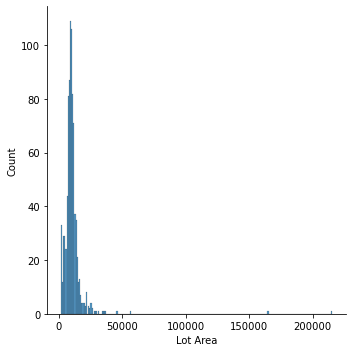

In [216]:
sns.displot(traindata_mod['Lot Area'])

#### Perform log transformation

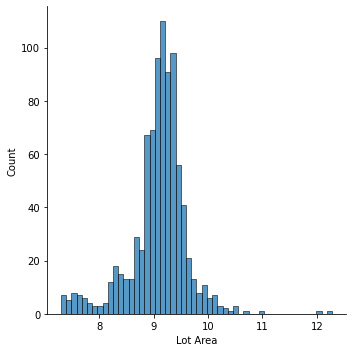

In [217]:
sns.displot(np.log(traindata_mod['Lot Area']));

Replace highly skewed & high kurtosis data with log scaled data.

In [218]:
traindata_mod['Lot Area_log'] = np.log(traindata_mod['Lot Area'])

In [219]:
traindata_mod = traindata_mod.drop(columns=['Lot Area'])

In [220]:
traindata_mod.isnull().sum().sum()

0

In [221]:
final_test = traindata_mod

In [222]:
final_test.shape

(878, 215)

#### Output dataframes to csv files

In [223]:
final_test.to_csv('./datasets/final_test.csv', index=False)

## Cleaned test data has been output to csv

#### Part 3 will be feature selection for prediction later in modeling.